<a href="https://colab.research.google.com/github/sijacinto/RegressaoLinearSorvetes/blob/main/Sorvete_Regress%C3%A3oLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sakshisatre/ice-cream-sales-dataset")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/ice-cream-sales-dataset


In [4]:
import os
print("Contents of dataset files:", os.listdir(path))

Contents of dataset files: ['Ice Cream.csv']


In [6]:
import pandas as pd
df = pd.read_csv(path + "/Ice Cream.csv")
df.head()

,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317
...,...,...
95,9.1,213
96,20.3,475
97,19.4,461
98,14.7,344


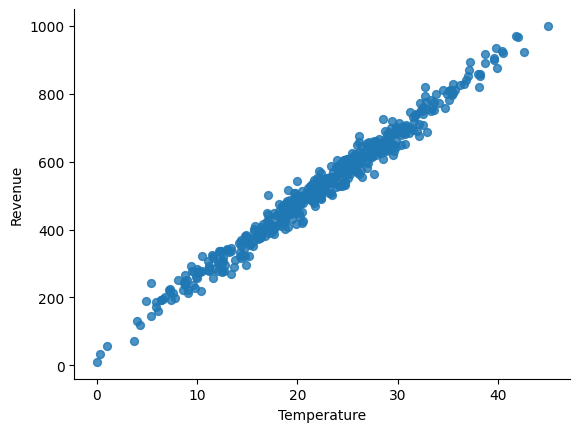

In [11]:
# @title Temperature vs Revenue

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Temperature', y='Revenue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
df.to_csv('IceCream.csv', index=False) # index=False prevents saving the index to the file.

In [12]:
# prompt: gerar modelo de regressão linear

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare the data
X = df[['Temperature']]  # Features (Temperature)
y = df['Revenue']  # Target (Revenue)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

# Print the model's coefficients (slope and intercept)
print(f"Intercept: {model.intercept_}")
print(f"Coefficient (slope): {model.coef_[0]}")


# Example prediction
new_temp = [[30]]  # Example temperature
predicted_revenue = model.predict(new_temp)
print(f"Predicted revenue for a temperature of 30: {predicted_revenue[0]}")


Mean Squared Error: 652.4938284912412
Root Mean Squared Error: 25.543958747446354
R-squared: 0.9771509516333023
Intercept: 46.17834580774047
Coefficient (slope): 21.384000731002768
Predicted revenue for a temperature of 30: 687.6983677378236


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
